# 10wk-1: 퀴즈6

최규빈  
2024-05-08

<a href="https://colab.research.google.com/github/guebin/PP2024/blob/main/posts/10wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

> **Caution**
>
> -   전북대 학생들을 시험당일 학생증을 지참할 것. (출석체크 및
>     본인확인) 학생증 외에 신분증 여권등도 가능.
> -   부정행위 (카카오톡 채팅을 통한 코드공유, 생성형모델 사용, 대리시험
>     등) 적발시 F 처리함.
> -   퀴즈 중 지각할 경우 지각사실을 기록함. 하지만 별 다른 감점은 하지
>     않음.
> -   `.ipynb` 파일 형태로 제출된 답안지만 채점하며 그 외의 형식
>     (`.hwp`, `.py` 등)은 채점하지 않음. 즉 0점 처리함.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# 1. MNIST – 40점

> 모두 맞출경우만 정답으로 인정

아래의 코드를 실행하여 MNIST 자료를 불러오라.

In [4]:
# URL 설정
url = 'https://github.com/guebin/PP2023/raw/main/posts/02_DataScience/mnist.npz'

# URL에서 파일 다운로드
urllib.request.urlretrieve(url, './mnist.npz')

# 데이터 로드
data = np.load('./mnist.npz')
xtrain, ytrain, xtest, ytest = data['x_train']/255, data['y_train'], data['x_test']/255, data['y_test']

# mnist.npz 삭제
!rm mnist.npz

`(1)` xtrain, xtest를 합쳐서 shape이 (70000,28,28) 인 numpy array를
생성하고 이것을 `X`에 저장하라.

`(2)` 아래의 코드에 43052대신 본인 학번 끝의 5자리를 입력하여 (3,3)
크기의 난수를 생성하라.

In [5]:
np.random.seed(43052)
np.random.binomial(n=1,p=0.5,size=(3,3))

위에서 생성된 난수를 저장된 `X`의 평균이미지를 concat하여 시각화하라.

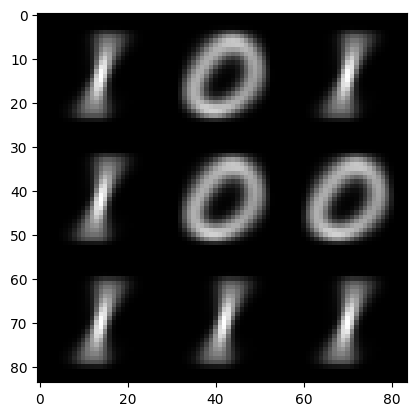

In [16]:
# 시각화예시

> 주의: 시각화하는 이미지는 (84,84) 의 shape을 가지고 있어야 한다.

# 2. 공든탑쌓기 – 60점

> (1)-(2)는 점수없음. (풀지 않아도 무방) // (3) 만 맞출경우 20점,
> (3)-(4) 모두 맞출경우 60점

규빈과 다호가 블록을 사용하여 탑을 쌓는다. 규빈은 한 번에 2개의 블록을
사용하여 탑을 쌓지만, 실수로 탑을 무너뜨릴 확률이 50%이다. 한 번 무너진
탑은 다시 처음부터 쌓아야 한다. 다호는 한 번에 1개의 블록을 사용하여
신중하게 탑을 쌓는다. 다호는 천천히 탑을 쌓지만 실수로 탑을 무너뜨리지
않는다.

`(1)` 규빈과 다호가 2층 높이의 탑을 먼저 쌓는 내기를 하였다고 하자. 탑을
쌓을수 있는 기회는 2회 준다. 이 내기는 누가 유리한가? 시뮬레이션을
통하여 근거를 설명하라. (둘이 동시에 탑을 쌓을경우 무승부로 판단한다.)

`(2)` 규빈과 다호가 10층 높이의 탑을 먼저 쌓는 내기를 하였다고 하자.
탑을 쌓을수 있는 기회는 10회 준다. 이 내기는 누가 유리한가? 시뮬레이션을
통하여 근거를 설명하라. (둘이 동시에 탑을 쌓을경우 무승부로 판단한다.)

`(3)` (2)와 같은 게임규칙[1]에서 규빈은 본인이 불리하다는 사실을
알아챘다. 규빈은 아래와 같이 전략을 수정하였다.

-   규빈탑의 높이 \<8 일 경우: (다호처럼) 1개의 블록만 안전하게 쌓는다.
    이때 1개의 블록쌓기는 100% 확률로 성공한다.
-   규빈탑의 높이 \>=8 일 경우: 2개의 블록을 쌓으려고 시도한다 (50%의
    확률로 성공 / 50%의 확률로 실패, 실패시 규빈의 블록 높이는 0이 된다)

규빈이 전략을 수정함에 따라 내기는 누가 유리해지는가? 근거를 설명하라.
(둘이 동시에 탑을 쌓을경우 무승부로 판단한다.)

> 이 문제는 시뮬레이션을 이용하여 근거를 설명하지 않아도 무방함 (해도
> 되고 안해도 되고..)

`(4)` (2)와 같은 게임규칙[2]에서 규빈이 아래와 같이 전략을 수정한다면
누가 유리한가? 시뮬레이션을 통하여 근거를 설명하라.

-   규빈탑의 높이 \<2 일 경우: 2개의 블록을 쌓으려고 시도한다 (50%의
    확률로 성공 / 50%의 확률로 실패, 실패시 규빈의 블록 높이는 0이 된다)
-   규빈탑의 높이 \>=2 일 경우: (다호처럼) 1개의 블록만 안전하게 쌓는다.
    이때 1개의 블록쌓기는 100% 확률로 성공한다.

[1] 10층높이의 탑을 먼저 쌓는 쪽이 이기며, 기회는 10번 주는 게임

[2] 10층높이의 탑을 먼저 쌓는 쪽이 이기며, 기회는 10번 주는 게임